# Lab 9

Ainsley Denham  
Ava Medalinski  
Melissa May

# Methods

**Data Sources and Collection**

Our study investigates the relationship between environmental air quality and respiratory health outcomes across Colorado counties. We compiled data from publicly available health and environmental monitoring sources to conduct a comparative analysis of asthma hospitalization rates and ambient air quality.

Asthma hospitalization data were obtained from the Colorado Environmental Public Health Tracking (COEPHT) program, which maintains comprehensive county-level health surveillance records. This dataset provided standardized rates of hospitalization and emergency department visits per 10,000 residents across Colorado counties, serving as our primary health outcome measure.

Air quality measurements were also sourced from the COEPHT system, which aggregates data from regulatory monitoring stations across the state. We focused on key criteria pollutants such as particulate matter (PM2.5) and ozone, which are commonly associated with respiratory issues.

For spatial analysis of emission sources and exposure intensity, we incorporated data from the Western Regional Air Partnership (WRAP) Emissions Data Management System. The WRAP database provided crucial information on annual emissions from various industrial, mobile, and area sources across different geographic locations throughout Colorado. This emissions inventory allowed us to identify and quantify pollution sources at a fine spatial resolution, helping to explain variations in air quality that might not be captured by fixed monitoring stations alone.

By integrating the WRAP emissions data with our health outcome measures, we were able to analyze the spatial relationship between emission sources, exposure intensity, and asthma hospitalization rates across Colorado’s diverse geography. This approach provided a more comprehensive assessment of potential exposure pathways than would be possible using only ambient air monitoring data, particularly for counties with limited monitoring coverage.

**Data Preparation and Cleaning**

To ensure consistency and analytical rigor in our comparison of air quality and asthma hospitalization rates across Colorado counties, we conducted several data cleaning and preparation steps.

1.  **Handling Missing Data:** We used colSums(is.na()) to identify missing values within each dataset and applied na.omit() to exclude incomplete records. This step was particularly important for maintaining consistency across years and counties in our comparative analysis.

2.  **Standardizing County Identifiers:** County names and codes were standardized using rename() and related formatting functions to enable seamless merging across datasets. This ensured geographic consistency when aligning air quality measurements with corresponding asthma hospitalization rates.

3.  **Health Outcome Verification:** Asthma hospitalization data were already standardized as rates per 10,000 residents. We cross-verified this methodology across counties and yars to confirm comparability and consistency.

4.  **Air Quality Data Selection and Aggregation:** We filtered the air quality dataset to include pollutants most relevant to respiratory health, particularly PM2.5 and ozone. For each county and year, we calculated average annual concentrations to align with the temporal resolution of our health outcomes data. We also flagged counties with incomplete monitoring coverage to note potential gaps in spatial representation.

5.  **Dataset Merging:** The final analysis dataset was created by merging the cleaned and standardized health and air quality data at the county level. This allowed us to conduct comparative and potentially spatial analyses while maintaining consistent geographic units across all variables.

This rigorous data preparation process ensured that our subsequent analyses would be based on comparable metrics across counties of vastly different population sizes, from densely populated urban centers like Denver to sparsely populated rural counties, thereby preventing population size from confounding our assessment of relationships between environmental exposures and health outcomes.

**Spatial Data Methodology**

To look at the correlation between asthma rates and major point sources of air pollution, we mapped our asthma rates and overlaid the locations of the plants that had been identified as major point sources. We used the sf package to get the boundaries of the counties and to create coordinates of the plants. We then plotted both data sets using ggplot to look at our results.

While this spatial data analysis is something we intend to work on more in the future, we definitely have existing plans to work with this data and implement a more comprehensive framework for data analysis.

# Results

## Air quality data

In [ ]:
VOC_point_source_emissions <- read.csv("~/MY_VOC.csv")

PM10_point_source_emissions <- read.csv("C:/Users/ainsl/Downloads/PM10_point_source(Sheet1).csv")

NOx_major_point_source_emissions <- read.csv("C:/Users/ainsl/Downloads/NOx_point_source(Sheet1).csv")

air_quality_data <- read.csv("C:/Users/ainsl/Downloads/PM2.5_average_concentration.csv")


## Asthma Data

In [ ]:
asthma_data <- read.csv("C:/Users/ainsl/Downloads/EPHT_REF_COEPHT Asthma Data_2023_EN.xlsx - ED AA Asthma 2011-2023.csv")


In [ ]:
library(ggplot2)


##Air Quality and Asthma Statistical Relationship

In [ ]:
asthma_data <- asthma_data[, !duplicated(colnames(asthma_data))]

air_quality_data$county <- tolower(trimws(air_quality_data$county))
colnames(asthma_data)[colnames(asthma_data) == "COUNTY"] <- "county"  # Fix uppercase if not already done
asthma_data$county <- tolower(trimws(asthma_data$county))

asthma_data <- asthma_data[asthma_data$county != "statewide", ]

stopifnot("county" %in% colnames(air_quality_data))
stopifnot("county" %in% colnames(asthma_data))

merged_data <- merge(air_quality_data, asthma_data, by = "county")

clean_data <- merged_data[!is.na(merged_data$annual_average_concentration) & !is.na(merged_data$RATE), ]

lm_model <- lm(RATE ~ annual_average_concentration, data = clean_data)
summary(lm_model)



Call:
lm(formula = RATE ~ annual_average_concentration, data = clean_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.719  -9.373  -2.459   6.851  58.178 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  10.28626    0.64873   15.86   <2e-16 ***
annual_average_concentration  2.54920    0.08543   29.84   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.8 on 8865 degrees of freedom
Multiple R-squared:  0.09128,   Adjusted R-squared:  0.09117 
F-statistic: 890.4 on 1 and 8865 DF,  p-value: < 2.2e-16

In [ ]:
correlation <- cor(clean_data$annual_average_concentration, clean_data$RATE, use = "complete.obs")
print(correlation)


[1] 0.3021191

`geom_smooth()` using formula = 'y ~ x'

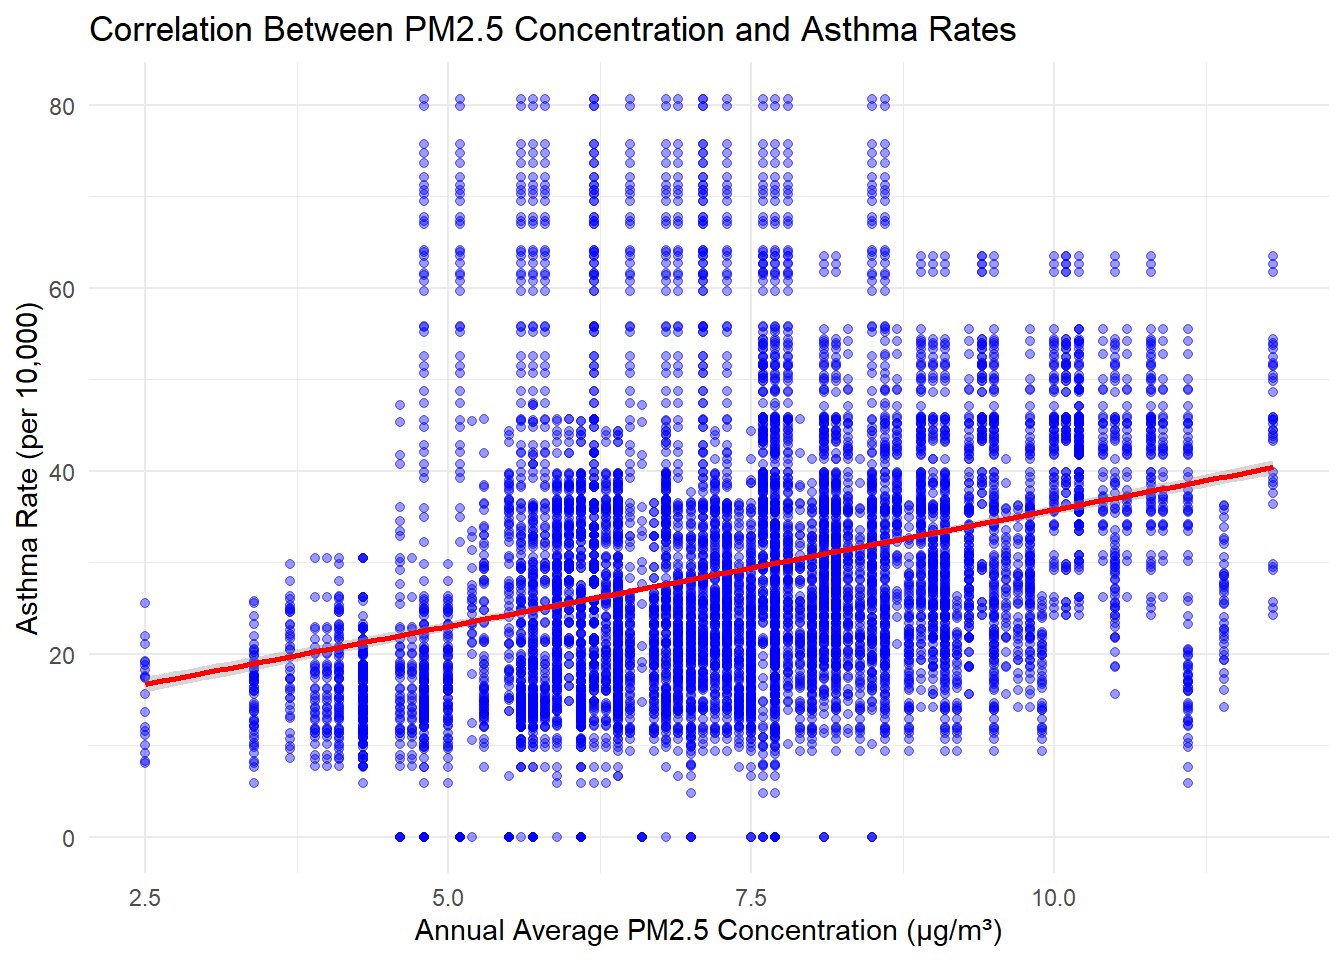

In [ ]:
ggplot(clean_data, aes(x = annual_average_concentration, y = RATE)) +
  geom_point(alpha = 0.4, color = "blue") +
  geom_smooth(method = "lm", color = "red", se = TRUE) +
  labs(
    title = "Correlation Between PM2.5 Concentration and Asthma Rates",
    x = "Annual Average PM2.5 Concentration (µg/m³)",
    y = "Asthma Rate (per 10,000)"
  ) +
  theme_minimal()


We merged the air quality and asthma hospitalization datasets at the county level after standardizing county names and removing missing values. This produced a clean dataset with 8,865 observations.

A linear regression model was fit with asthma hospitalization rate (RATE) as the outcome variable and annual average pollutant concentration as the predictor. The model revealed a **positive association** between pollutant concentration and asthma hospitalization rate (β = 2.55, standard error = 0.085, p \< 0.001). The model intercept was 10.29.

The multiple R-squared value for the model was 0.091, indicating that approximately 9.1% of the variability in asthma hospitalization rates was explained by pollutant concentrations. The residual standard error was 13.8.

A Pearson correlation coefficient calculated between annual pollutant concentrations and asthma hospitalization rates was 0.30, suggesting a moderate positive linear relationship between two variables.

We have not finished our spatial data map, but will input results when that is finished.

# Discussion

PM2.5 Estimate (2.55): For every 1 µg/m³ increase in annual PM2.5 concentration, the asthma rate increases by approximately 2.55 visits per 10,000 people.

p-value (\< 2.2e-16): Extremely significant — this relationship is not due to random chance.

R² = 0.091: About 9% of the variability in asthma rates is explained by PM2.5. Not huge, but not bad for a single predictor in public health — air pollution is just one of many factors.

The results of our correlation test between asthma rates and air quality, specifically amounts of PM2.5 (particulate matter that is 2.5 microns or smaller), show that there is a small statistically significant correlation. We found that for every 1 µg/m³ increase in annual PM2.5 concentration, the asthma rate increases by approximately 2.55 visits per 10,000 people.  A p-value of 2.2e-16 tells us to fail to reject our null hypothesis, that there is a statistically significant relationship between the two variables. Our R-squared value was 0.091, meaning that about 9% of the variability in asthma rates can be explained by PM2.5 factors. This is an extremely low rate, suggesting that there is not a strong correlation between the variables. There are many variables that have been proven to be contributors to asthma, such as allergens, exercise, and other irritants. Air pollution has been shown in previous studies to be a contributor to asthma as well (@tiotiu2020). Our results suggest that air pollution, specifically PM2.5, while not the main cause of this respiratory illness, could be a contributing factor. 

Our asthma rate data set only included children with asthma that have been hospitalized as a result of the condition. This is an extremely small sample, and this could have skewed our results. The next step would be to find a data set with more data that included all ages and included anyone with asthma, not just the most severe cases. 

We have not finished the spatial data section, but will discuss results when that is done.